In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data_1 = pd.read_csv("training_text.csv", sep=r'\|\|', engine='python')
Data_2 = pd.read_csv("training_variants.csv")

In [3]:
Data_1.reset_index(inplace=True)
Data_1.rename(columns={'index': 'ID'}, inplace=True)

In [4]:
Data_1.rename(columns={'ID,Text': 'Text'}, inplace=True)

In [5]:
Data_1.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [6]:
Data_2.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [7]:
Merge_Data = pd.merge(Data_1, Data_2, on='ID')

In [8]:
Merge_Data.head(10)

,ID,Text,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4
5,5,Oncogenic mutations in the monomeric Casitas B...,CBL,V391I,4
6,6,Oncogenic mutations in the monomeric Casitas B...,CBL,V430M,5
7,7,CBL is a negative regulator of activated recep...,CBL,Deletion,1
8,8,Abstract Juvenile myelomonocytic leukemia (JM...,CBL,Y371H,4
9,9,Abstract Juvenile myelomonocytic leukemia (JM...,CBL,C384R,4


In [9]:
Merge_Data.isnull().sum()

ID           0
Text         5
Gene         0
Variation    0
Class        0
dtype: int64

In [10]:
Merge_Data.dropna(axis = 0, inplace = True)

In [11]:
Merge_Data.isnull().sum()

ID           0
Text         0
Gene         0
Variation    0
Class        0
dtype: int64

In [12]:
Merge_Data.duplicated().sum()

0

<font color="red" size="+4"><strong>NLP</strong></font>

<font color="blue">

**Numerical:-->** **ID**, **Class**

**Textual:-->** **Text**

**Categorical:-->** **Gene**, **Variation**

</font>


In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

Merge_Data['Gene'] = label_encoder.fit_transform(Merge_Data['Gene'])
Merge_Data['Variation'] = label_encoder.fit_transform(Merge_Data['Variation'])

In [14]:
for i in Merge_Data['Text'].values[0:1]:
    print(i)
    #print('==================================\n')

Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10

In [15]:
import re
def decontracted(phrase):
    phrase=re.sub(r"can\'t",r"can not",phrase)
    phrase=re.sub(r"won't",r"will not",phrase)
    
    #generally doing
    phrase=re.sub(r"\'m",r' am',phrase)
    phrase=re.sub(r"\'d",r' would',phrase)
    phrase=re.sub(r"\'ll",r' will',phrase)
    phrase=re.sub(r"\'ve",r' have',phrase)
    phrase=re.sub(r"\'s",r' is',phrase) 
    phrase=re.sub(r"\'t",r' not',phrase) 
    phrase=re.sub(r"\'re",r' are',phrase)    

    #specificall doing
    for i in ['/', '\\r', '\\n', '?', '\r', '\n', '\"', ':', '(', ')', '!', '\t', '\\t']:
        if i in phrase:
            phrase=phrase.replace(i ,"")
    return phrase

In [16]:
# Check the size of the array
array_size = len(Merge_Data['Text'].values)
print("Array size:", array_size)

if 0 <= 20000 < array_size:
    sent = decontracted(Data_1['Text'].values[20000])
    print(sent)
else:
    print("Index 20000 is out of bounds for the array.")

Array size: 3316
Index 20000 is out of bounds for the array.


In [17]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [18]:
from tqdm import tqdm
import numpy as np  

preprocessed_essay = []
for sentence in tqdm(Merge_Data['Text'].values):
    if isinstance(sentence, str):
        sent = decontracted(sentence)
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e not in stop)
        preprocessed_essay.append(sent.lower().strip())
    else:
        # Handle NaN values or non-string elements
        preprocessed_essay.append("")  # or any other handling you prefer

100%|█████████████████████████████████████████████████████████████████████████████| 3316/3316 [00:21<00:00, 154.83it/s]


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

Merge_Data['Text'] = Merge_Data['Text'].str.lower()
Merge_Data['Text'] = Merge_Data['Text'].replace('[^\w\s]', '', regex=True)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

text_features = tfidf_vectorizer.fit_transform(Merge_Data['Text'].astype('U'))

text_df = pd.DataFrame(text_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

Merge_Data = pd.concat([Merge_Data, text_df], axis=1)

Merge_Data = Merge_Data.drop('Text', axis=1)

#print(Merge_Data.head())

<font color="red" size="+4"><strong>EDA</strong></font>

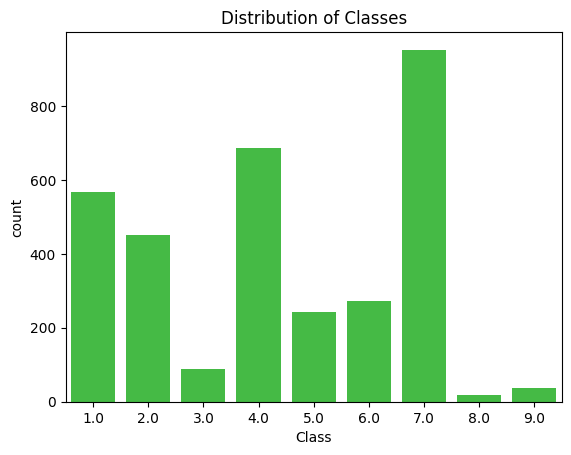

In [20]:
sns.countplot(x='Class', data=Merge_Data,color = "limegreen")
plt.title('Distribution of Classes')
plt.show()

<span style="color:green; font-size:20px; font-weight:bold;">Insights</span>

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  func(x=x, y=y, **kwargs)


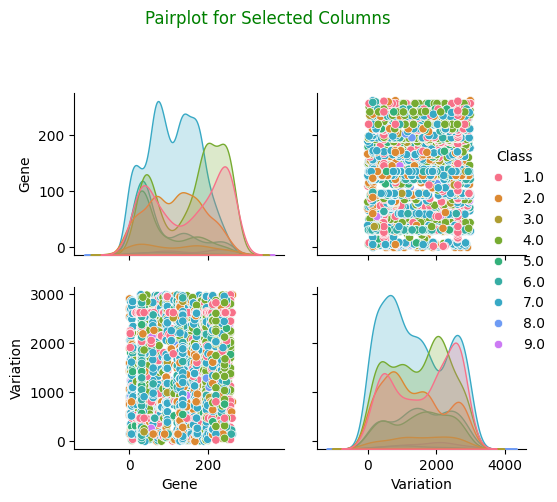

In [21]:
custom_palette = sns.color_palette("husl", n_colors=len(Merge_Data['Class'].unique()))
sns.pairplot(Merge_Data[['Gene', 'Variation', 'Class']], hue='Class', palette=custom_palette, markers='o')
plt.suptitle('Pairplot for Selected Columns', y=1.02,color= "green")
plt.tight_layout(pad=2.0)
plt.show()

<span style="color:green; font-size:20px; font-weight:bold;">Insights</span>

This code snippet employs Seaborn's pairplot function to generate a grid of scatterplots, showcasing the relationships between selected columns ('Gene', 'Variation') from the Merge_Data dataset, with each point colored based on its respective class. A custom color palette, derived from the HUSL color space and tailored to the number of unique classes in the dataset, is utilized to ensure visual distinctiveness. Additionally, circular markers ('o') are employed for data points. The title "Pairplot for Selected Columns" is added with a green color to denote its significance, aiding in interpretation. The tight_layout function enhances plot aesthetics by adjusting subplot parameters. This visualization allows developers and stakeholders to discern potential patterns or correlations between variables across different classes, facilitating deeper insights into the dataset's characteristics.

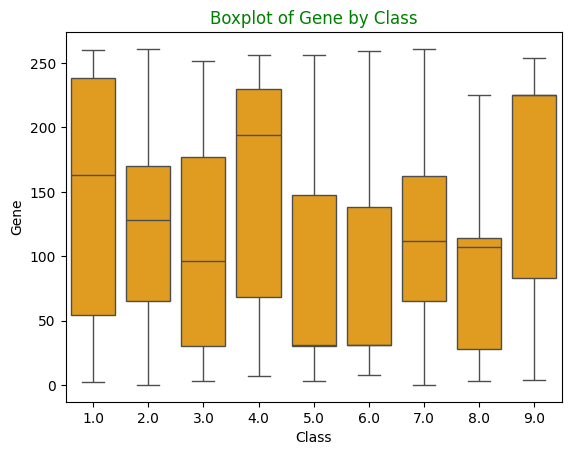

In [22]:
sns.boxplot(x='Class', y='Gene', data=Merge_Data, color='orange')
boxprops = dict(edgecolor='black', linewidth=2)
plt.title('Boxplot of Gene by Class',color = "Green")
plt.show()

<span style="color:green; font-size:20px; font-weight:bold;">Insights</span>

This code utilizes Seaborn's boxplot function to create a box plot, representing the distribution of the 'Gene' variable across different classes in the Merge_Data dataset. Each box plot summarizes the distribution of 'Gene' values within a specific class, with the median (middle line), interquartile range (box), and potential outliers (whiskers) depicted. The boxes are colored orange for visual distinction. Additionally, box properties such as edge color and width are customized using the boxprops parameter. The title "Boxplot of Gene by Class" is added with green color for emphasis. This visualization aids in understanding the variability of 'Gene' expression across different classes, helping to identify potential class-specific patterns or outliers within the dataset.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8740\3862573863.py:2: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(x='Gene', y='Variation', data=Merge_Data, hue='Class', palette=custom_palette, alpha=0.7, edgecolor='none')


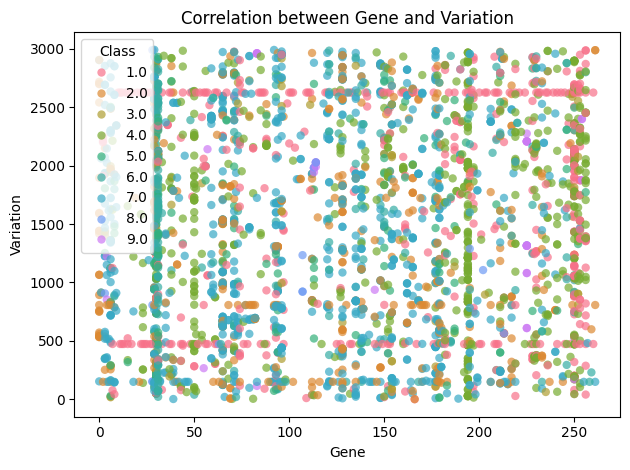

In [23]:
custom_palette = sns.color_palette("husl", n_colors=len(Merge_Data['Class'].unique()))
sns.scatterplot(x='Gene', y='Variation', data=Merge_Data, hue='Class', palette=custom_palette, alpha=0.7, edgecolor='none')
plt.title('Correlation between Gene and Variation')
plt.tight_layout()
plt.show()

<span style="color:green; font-size:20px; font-weight:bold;">Insights</span>

This code snippet utilizes Seaborn's scatterplot function to generate a scatter plot, displaying the relationship between the 'Gene' and 'Variation' variables from the Merge_Data dataset. Each point on the plot represents a data instance, with its position determined by the values of 'Gene' and 'Variation', while the color indicates its class membership. A custom color palette derived from the HUSL color space is applied to ensure distinct colors for each class. Additionally, the transparency of the points (alpha) is set to 0.7 for better visualization, and no edge color is specified ('none'). The title "Correlation between Gene and Variation" provides context to the plot, aiding interpretation. Overall, this visualization facilitates the examination of potential correlations or patterns between the 'Gene' and 'Variation' features across different classes in the dataset.

<Axes: xlabel='Class', ylabel='Gene'>

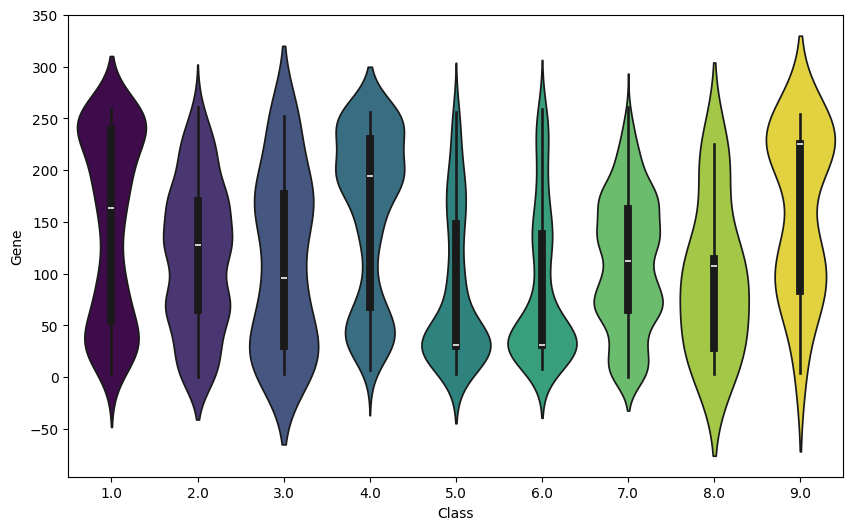

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Gene', data=Merge_Data, hue='Class', palette='viridis', legend=False)

<span style="color:green; font-size:20px; font-weight:bold;">Insights</span>

This code utilizes Seaborn's violinplot function to create a violin plot, which presents the distribution of the 'Gene' variable across different classes in the Merge_Data dataset. Each violin plot represents the distribution of 'Gene' values within a specific class, with the width indicating the density of data points at various values. The plot is grouped by class, and the color palette 'viridis' is applied to enhance visual contrast. The legend is disabled to avoid redundancy since the class is already represented by color. By examining the width and shape of the violins, one can discern the distributional characteristics of 'Gene' across different classes. The figure size is adjusted to 10x6 to optimize visual clarity. This visualization aids in understanding the variability of 'Gene' expression among different classes in the dataset.

<font color="red" size="+4"><strong>Train Test Split</strong></font>

In [29]:
Merge_Data.loc[Merge_Data['TEXT'].isnull(),'TEXT'] = Merge_Data['Gene'] +'  '+Merge_Data['Variation']

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U2')) -> None

In [25]:
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s', '_')
result.Variation =  result.Variation.str.replace('\s', '_')
X_train, test_df, y_train, y_test =  train_test_split(result, y_true, stratify=y_true, test_size=0.2)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

NameError: name 'result' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

x = Merge_Data.drop('Class', axis=1)  
y = Merge_Data.loc[:, 'Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

In [ ]:
max_val = y_train.max()  
min_val = y_train.min()  

train_norm = ((y_train - min_val) / (max_val - min_val)).values
test_norm = ((y_test - min_val) / (max_val - min_val)).values

In [ ]:
print(round(train_norm.mean(), 2))
print(round(test_norm.mean(), 2))

<font color="red" size="+4"><strong>KNN</strong></font>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


max_accuracy = 0
best_k = 0
results = []

for i in range(1, 11):
    knn_cv = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', leaf_size=30, p=2)
    cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5)
    mean_score = sum(cv_scores) / len(cv_scores)
    results.append((i, mean_score))
    
   
    if mean_score > max_accuracy:
        max_accuracy = mean_score
        best_k = i


for result in results:
    print(result)


print("\n\033[1;94mThe max accuracy is {:.4f} for k = {}\033[0m".format(max_accuracy, best_k))


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
accuracy_score(y_test.values, knn.predict(x_test))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)  
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)


accuracy = accuracy_score(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

print("\033[1;34mAccuracy: {:.2f}\033[0m".format(accuracy))  
print("\033[1;34mClassification Report:\n{}\033[0m".format(report))

<font color="red" size="+4"><strong>NB</strong></font>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

max_accuracy = 0
best_k = 0
results = []


for i in range(1, 11):
    nb_cv = GaussianNB()  
    cv_scores = cross_val_score(nb_cv, x_train, y_train, cv=5)  
    mean_score = sum(cv_scores) / len(cv_scores)  
    results.append((i, mean_score))  
    
   
    if mean_score > max_accuracy:
        max_accuracy = mean_score
        best_k = i

# Print the results
for result in results:
    print(result)

print("\n\033[1;94mThe max accuracy is {:.4f} for k = {}\033[0m".format(max_accuracy, best_k))

<font color="red" size="+4"><strong>LogisticRegression</strong></font>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

max_accuracy = 0
best_C = 0
results = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_values:
    lr_cv = LogisticRegression(C=C, max_iter=1000)
    
    cv_scores = cross_val_score(lr_cv, x_train_scaled, y_train, cv=5)
    
    mean_score = sum(cv_scores) / len(cv_scores)
    
    results.append((C, mean_score))
    
    if mean_score > max_accuracy:
        max_accuracy = mean_score
        best_C = C

# Print results
for result in results:
    print(result)

# Print the best C and max accuracy
print("\n\033[1;94mThe max accuracy is {:.4f} for C = {:.3f}\033[0m".format(max_accuracy, best_C))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_C = 0
best_kernel = ''

C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf', 'poly']

for C in C_values:
    for kernel in kernel_values:
        svm_cv = SVC(C=C, kernel=kernel)
        
        cv_scores = cross_val_score(svm_cv, x_train, y_train, cv=5)
        
        mean_score = sum(cv_scores) / len(cv_scores)
        
        print("C = {}, kernel = {}: Mean Accuracy = {:.4f}".format(C, kernel, mean_score))
        
        if mean_score > max_accuracy:
            max_accuracy = mean_score
            best_C = C
            best_kernel = kernel

# Print final results
print("\n\033[1;94mThe max accuracy is {:.4f} for C = {} and kernel = {}\033[0m".format(max_accuracy, best_C, best_kernel))


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
predictions = svm_classifier.predict(x_test)